In [3]:
%cd ..

/home/nmandi/Repos/plant-traits-kaggle


/home/nmandi/miniconda3/envs/lightning/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

# EDA on test.csv

In [3]:
df = pd.read_csv('data/raw/planttraits2024/test.csv')

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6545 entries, 0 to 6544
Data columns (total 164 columns):
 #    Column                                                                 Dtype  
---   ------                                                                 -----  
 0    id                                                                     int64  
 1    WORLDCLIM_BIO1_annual_mean_temperature                                 float64
 2    WORLDCLIM_BIO12_annual_precipitation                                   float64
 3    WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month  float64
 4    WORLDCLIM_BIO15_precipitation_seasonality                              float64
 5    WORLDCLIM_BIO4_temperature_seasonality                                 float64
 6    WORLDCLIM_BIO7_temperature_annual_range                                float64
 7    SOIL_bdod_0.5cm_mean_0.01_deg                                          int64  
 8    SOIL_bdod_100.200cm_mean_0.01_deg   

In [5]:
df.describe()


,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,VOD_X_1997_2018_multiyear_mean_m03,VOD_X_1997_2018_multiyear_mean_m04,VOD_X_1997_2018_multiyear_mean_m05,VOD_X_1997_2018_multiyear_mean_m06,VOD_X_1997_2018_multiyear_mean_m07,VOD_X_1997_2018_multiyear_mean_m08,VOD_X_1997_2018_multiyear_mean_m09,VOD_X_1997_2018_multiyear_mean_m10,VOD_X_1997_2018_multiyear_mean_m11,VOD_X_1997_2018_multiyear_mean_m12
count,6.545000e+03,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000,...,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000
mean,1.930247e+08,13.565744,1058.339104,125.929570,51.638085,542.317973,25.467087,115.637892,141.002903,127.907105,...,0.374341,0.386791,0.393410,0.397236,0.399315,0.395898,0.393781,0.387597,0.378937,0.372905
std,2.601377e+07,7.295813,750.088379,139.210627,30.663688,296.284472,8.424315,18.500107,15.432760,16.717081,...,0.119471,0.123467,0.128634,0.137264,0.137448,0.137287,0.135884,0.129999,0.121263,0.117669
min,1.040495e+06,-10.908333,8.000000,3.566667,5.651237,18.719866,7.725000,44.000000,56.000000,46.000000,...,0.024555,0.022465,0.015992,0.005243,0.008057,0.006664,0.004333,0.012781,0.013120,0.009986
25%,1.971690e+08,8.374963,564.633362,51.928570,26.002605,346.196808,19.654222,104.000000,131.000000,118.000000,...,0.286581,0.296758,0.300443,0.295987,0.297844,0.293414,0.291561,0.291953,0.292901,0.290589
50%,2.008276e+08,14.376865,839.700012,89.607140,44.043266,476.105438,24.289333,117.000000,143.000000,129.000000,...,0.359260,0.374658,0.378144,0.375051,0.378714,0.375422,0.375623,0.370606,0.364082,0.359433
75%,2.022672e+08,18.858631,1327.666626,154.409531,74.721260,723.948975,29.916000,129.000000,152.000000,140.000000,...,0.460342,0.479379,0.491111,0.497005,0.493472,0.486382,0.483449,0.475766,0.463359,0.452274
max,2.030654e+08,28.243513,6760.715332,2401.733398,174.304184,1743.707031,58.549999,160.000000,188.000000,174.000000,...,0.752027,0.774559,0.780773,0.801355,0.839684,0.839229,0.825483,0.803632,0.775951,0.759350


In [11]:
def plot_hists(df, n_cols=4):
    n_rows = int(np.ceil(len(df.columns) / n_cols))
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))
    
    for i, col in enumerate(df.columns):
        ax = axes[i // n_cols, i % n_cols]
        sns.histplot(df[col], ax=ax)
        ax.set_title(col)
    plt.show()

/Users/nathanmandi/opt/anaconda3/envs/py10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nathanmandi/opt/anaconda3/envs/py10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nathanmandi/opt/anaconda3/envs/py10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nathanmandi/opt/anaconda3/envs/py10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

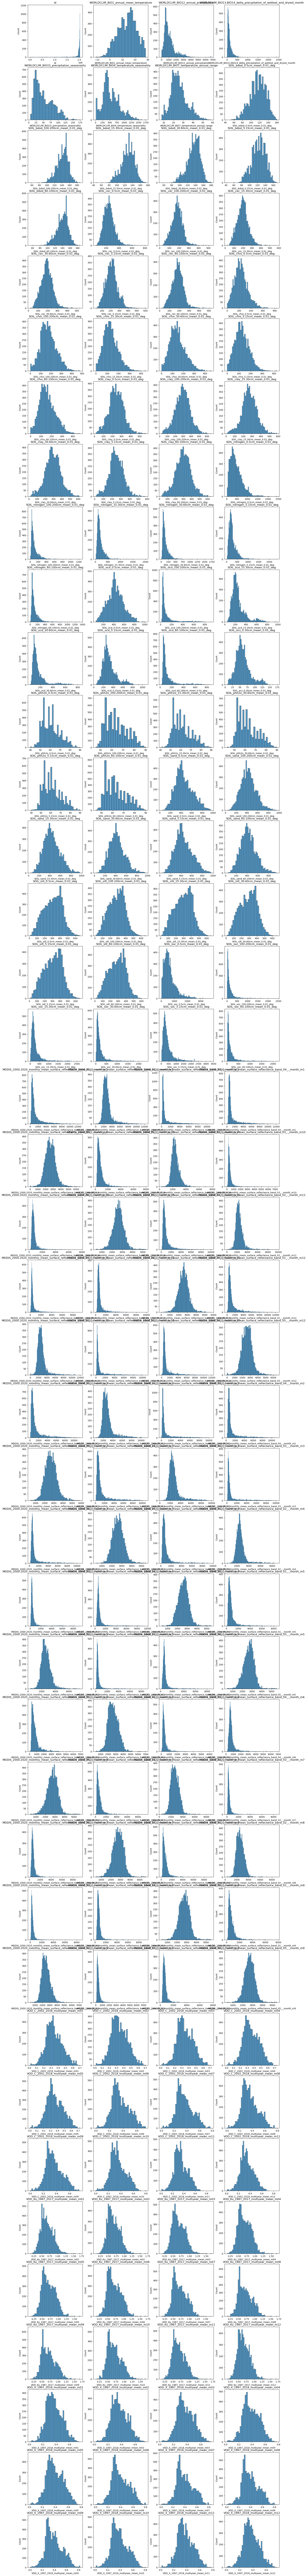

In [12]:
plot_hists(df)

{dtype('int64'), dtype('float64')}

In [4]:
# train.csv to assure columns match
train_df = pd.read_csv('data/raw/planttraits2024/train.csv')
train_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55489 entries, 0 to 55488
Data columns (total 176 columns):
 #    Column                                                                 Dtype  
---   ------                                                                 -----  
 0    id                                                                     int64  
 1    WORLDCLIM_BIO1_annual_mean_temperature                                 float64
 2    WORLDCLIM_BIO12_annual_precipitation                                   float64
 3    WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month  float64
 4    WORLDCLIM_BIO15_precipitation_seasonality                              float64
 5    WORLDCLIM_BIO4_temperature_seasonality                                 float64
 6    WORLDCLIM_BIO7_temperature_annual_range                                float64
 7    SOIL_bdod_0.5cm_mean_0.01_deg                                          int64  
 8    SOIL_bdod_100.200cm_mean_0.01_deg 